# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) Či [matplotlib](https://matplotlib.org/).

In [2]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy'

# Imaginea cu care lucrÄm

Vom folosi o imagine din setul de date oferit implicit de cÄtre scipy.

In [3]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

NameError: name 'misc' is not defined

# Transformata Fourier a unei imagini

Transformata Fourier DiscretÄ se extinde uČor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ Či $n_2$ sunt poziČile pixelilor pe orizontalÄ, respectiv, pe verticalÄ
* bin-urile rezultate corespund poziČiilor pixelilor
* spectrul este ĂŽn continuare simetric
* proprietÄČile transformatei DFT 1D sunt respectate Či ĂŽn cazul celei 2D

Ăn continuare vom folosi rutina generalÄ `fft2` ce serveČte mai bine activitÄČii de ĂŽnvÄČare, deČi pentru semnale reale ar trebui sÄ folosim `rfft2` ce ĂŽntoarce doar informaČia esenČialÄ (ex. omite simetriile). De asemenea vom analiza spectrul ĂŽn scalÄ logaritmicÄ pentru a diferenČia mai bine magnitudinile bin-urilor DTF.

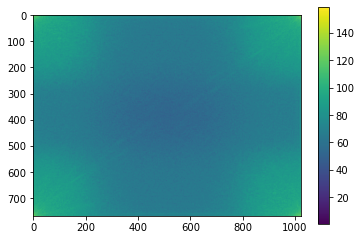

In [5]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

OperaČiile efectuate direct asupra imaginii se reflectÄ Či ĂŽn spectrul acesteia. IatÄ un exemplu a unei rotaČii de 45 de grade:

In [1]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

NameError: name 'ndimage' is not defined

Momentan pe axe sunt afiČate numÄrul bin-urilor. Pentru a obČine frecvenČele asociate folosiČi `fftfreq`:

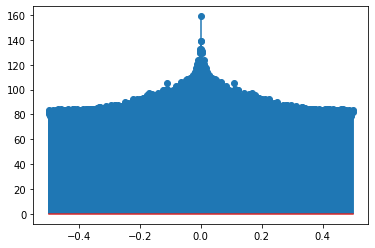

In [10]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvenČelor ĂŽnalte

Pentru a anula frecvenČele de peste un anumit prag `freq_cutoff` putem pur Či simplu anula intrÄrile din spectru Či aplica transformata Fourier inversÄ:

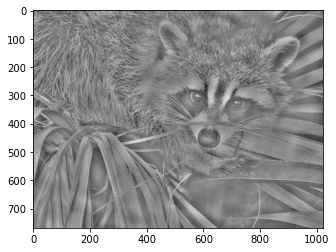

In [11]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbÄ ĂŽn mod egal spectrul semnalului. Este astfel egal distribuit Či regÄsit ĂŽn toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbÄ de-a lungul frecvenČelor.

Putem adÄuga zgomot ĂŽn limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

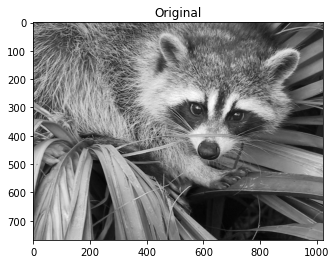

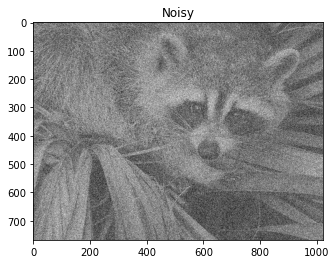

In [23]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] ProduceČi imaginile Či spectrul pentru funcČiile de mai jos Či daČi o explicaČie scurtÄ pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*AtenČie*: $x$ reprezintÄ informaČie ĂŽn domeniul timpului, $Y$ ĂŽn domeninul frecvenČei.

2. [4p] ComprimaČi imaginea cu ratonul de mai sus prin atenuarea frecvenČelor ĂŽnalte pĂ˘nÄ la un prag SNR autoimpus.

3. [4p] EliminaČi zgomotul adÄugat la imaginea cu ratonul produsÄ mai sus. PrezentaČi raportul SNR ĂŽnainte Či dupÄ.

4. [4p] AlegeČi o secvenČÄ scurtÄ de timp (ex. 5-10 secunde) Či eliminaČi un instrument la alegere din semnalul audio rezultat ĂŽn urma rezolvÄrii sarcinilor de la [laboratorul 3](https://cs.unibuc.ro/~pirofti/ps/ps-lab-3.pdf).